### Applying Basic NLP Python Libraries to Preprocess Text
S. Michael, 
8.30.23

This notebook uses the NLTK Toolkit in Python to perform basic preproccessing of text data

#### Pre-preprocessing
1. Check Python version
2. Load Gutenberg Project in nltk package & List available texts

In [5]:
#Check Python version
import sys
print(sys.version)

3.9.13 (main, Aug 25 2022, 18:29:29) 
[Clang 12.0.0 ]


In [6]:
#Load Gutenberg Project & Select Text
#source: https://www.nltk.org/book/ch02.html
from nltk.corpus import gutenberg
gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

#### Pre-processing Using NLTK Toolkit
1. Load text: Leaves of Grass by Walt Whitman (Note: loaded tokenized by words)
2. Convert to lower case
3. Remove punctuation
4. Remove stopwords
5. Stem
6. Lemmatize
7. Correct misspellings
8. Find 10 most used words
9. Plot 10 most used words

In [7]:
#Load text tokenized by words: Leaves of Grass by Walt Whitman
raw_text = gutenberg.words('whitman-leaves.txt')
#len(raw_text)

In [8]:
#Convert to lower case
def lower_case(text):
    return [w.lower() for w in text]
text=lower_case(raw_text)
#text[:50]

In [9]:
#Remove punctuation
import string
def remove_punc(text):
    no_punc = [w.translate(str.maketrans('', '', string.punctuation)) for w in text]
    # remove remaining tokens that are not alphabetic
    return [word for word in no_punc if word.isalpha()]
text = remove_punc(text)
#text[:50]

In [10]:
#Remove stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    return [word for word in text if not word in stop_words]

text = remove_stopwords(text)
#text[:50]


[nltk_data] Downloading package stopwords to /Users/sheri/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
#Stem
from nltk.stem.porter import PorterStemmer
#instantiatte stemming object
porter_stemmer = PorterStemmer()
def stemming(text):
    return [porter_stemmer.stem(word) for word in text]
stemmed_text = stemming(text)
stemmed_text[:25]

['leav',
 'grass',
 'walt',
 'whitman',
 'come',
 'said',
 'soul',
 'vers',
 'bodi',
 'let',
 'us',
 'write',
 'one',
 'return',
 'long',
 'long',
 'henc',
 'sphere',
 'group',
 'mate',
 'chant',
 'resum',
 'talli',
 'earth',
 'soil']

In [12]:
#Lemmatize
import nltk
from nltk.stem import 	WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
#instantiate Lemmatization object
lemmatizer = WordNetLemmatizer()
def lemmatizing(text):
    return [lemmatizer.lemmatize(word) for word in text]
lemm_text = lemmatizing(text)
lemm_text[:25]

[nltk_data] Downloading package wordnet to /Users/sheri/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/sheri/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


['leaf',
 'grass',
 'walt',
 'whitman',
 'come',
 'said',
 'soul',
 'verse',
 'body',
 'let',
 'u',
 'write',
 'one',
 'return',
 'long',
 'long',
 'hence',
 'sphere',
 'group',
 'mate',
 'chant',
 'resuming',
 'tallying',
 'earth',
 'soil']

In [ ]:
#Correct misspellings
from nltk.metrics.distance  import edit_distance
nltk.download('words')
from nltk.corpus import words
correct_words = words.words()
def spelling_correction(text):
    for word in text:
        temp = [(edit_distance(word, w),w) for w in correct_words if w[0]==word[0]]
        print(sorted(temp, key = lambda val:val[0])[0][1])

lemm_text = spelling_correction(lemm_text)
lemm_text[:20]

stem_text = spelling_correction(stem_text)
stem_text[:20]

In [13]:
#Find 10 most used words
from collections import Counter
counter_obj = Counter(lemm_text)
top10=counter_obj.most_common(10)

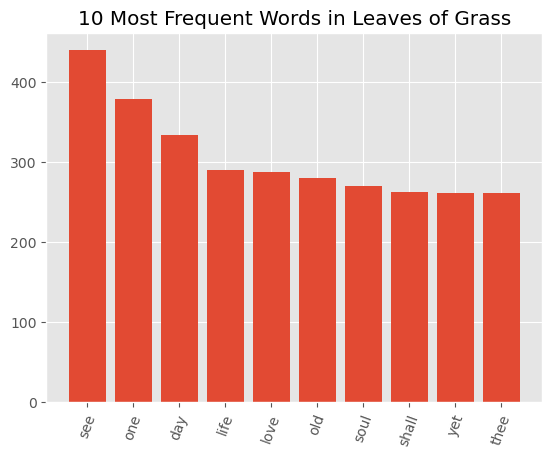

In [14]:
#Plot 10 most used words
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

plt.bar(range(len(top10)), [val[1] for val in top10], align='center')
plt.xticks(range(len(top10)), [val[0] for val in top10])
plt.xticks(rotation=70)
plt.title('10 Most Frequent Words in Leaves of Grass')
plt.show()